## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/BrainTumor.csv')
df.head()

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48


#### Preparing X and Y variables

In [20]:
df['Time to Recurrence (months)'] = df['Time to Recurrence (months)'].fillna(0)
df['Recurrence Site'] = df['Recurrence Site'].fillna('None')
X = df.drop(columns=['Patient ID', 'Survival Time (months)'],axis=1)
X.head()

,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site
0,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe
1,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,0.0,None
2,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe
3,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,0.0,None
4,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe


In [21]:
y = df['Survival Time (months)']

In [22]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [23]:
X = preprocessor.fit_transform(X)

In [24]:
X.shape

(2000, 31)

In [25]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1600, 31), (400, 31))

#### Create an Evaluate Function to give all metrics after model Training

In [26]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6.5978
- Mean Absolute Error: 5.0839
- R2 Score: 0.4071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8899
- Mean Absolute Error: 5.2869
- R2 Score: 0.3778


Lasso
Model performance for Training set
- Root Mean Squared Error: 8.2505
- Mean Absolute Error: 6.4548
- R2 Score: 0.0729
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.3792
- Mean Absolute Error: 6.5228
- R2 Score: 0.0797


Ridge
Model performance for Training set
- Root Mean Squared Error: 6.6003
- Mean Absolute Error: 5.0924
- R2 Score: 0.4067
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8888
- Mean Absolute Error: 5.2910
- R2 Score: 0.3780


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3.8408
- Mean Absolute Error: 1.8547
- R2 Score: 0.7991
-----------------------

### Results

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.834310
6,XGBRegressor,0.825816
4,Decision Tree,0.766088
3,K-Neighbors Regressor,0.723775
2,Ridge,0.377971
0,Linear Regression,0.377779
7,AdaBoost Regressor,0.303912
1,Lasso,0.079701


## Random Forest Regressor

In [33]:
rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 83.90


## Plot y_pred and y_test

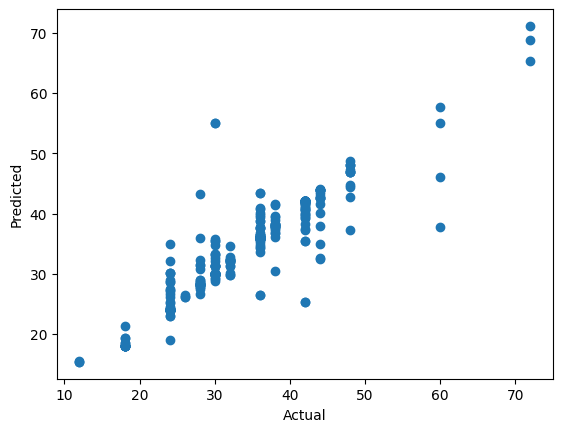

In [34]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

#### Difference between Actual and Predicted Values

In [40]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1860,36,36.000000,0.000000
353,36,36.000000,0.000000
1333,38,38.000000,0.000000
905,30,30.000000,0.000000
1289,38,41.623158,-3.623158
...,...,...,...
965,30,30.000000,0.000000
1284,44,43.820000,0.180000
1739,42,25.280000,16.720000
261,42,40.620000,1.380000
